## **Final Project**

We have almost reached the end of our time together (heartbreaking, I know). This final project is a capstone of sorts. We will answer a number of question from the Dig case study using everything we've learned so far. We will consider a number of questions that will bring together many of the topics we discussed I warn you, that some of these topics will be complex. That said, so are the real problems businesses face every day when working with data, and this section will give you practice tackling these kinds of problems.

#### Objective of the project -  The project aims to assist Dig in selecting the optimal restaurant location to launch the pilot program for its delivery service. Additionally, the analysis will recommend the most suitable season for the launch based on the gathered insights.



** Analysis Outline: For all the sections presented below, the structure of the answers will be consistent, encompassing four key components:

- Objective: Clearly stating the purpose of the analysis in each section.
- Thought Process: Providing an explanation of the approach and methodology chosen to address the objective.
- Code/Analysis: Presenting the relevant code snippets and data exploration to support the findings.
- Conclusion: Summarizing the results and insights derived from the analysis.


** Introduction to Package Imports: Before commencing the analysis, we import the following necessary packages:

- The pandas package is utilized to work with dataframes and efficiently analyze the data.
- The matplotlib package is essential for generating graphs and visualizations in question 5.
- The datetime package is employed to extract month information, which is crucial for identifying seasons in the analysis.

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import datetime as dt

## 1. New Product Analytics

As you read in the story of Dig, one of the company's greatest sources of price is that each restaurant prepares everything on site. Indeed, every one of its employees are trained to prepare food in it restaurants, in line with this ethos. There is, however, one exception - bottled and canned drinks. The infrastructure required to produce these items is usually prohibitive. Futhermore, a number of companies that produce these products share Dig's ethos for responsible courcing and high-quality ingredients. Therefore, it is perhaps unsurprising that, as you read, Dig does not produce its own bottled and canned drinks and instead stocks a number of products produced by other companies.

In this section, we consider a hypothetical furture in which Dig does decide to launch a new line of drinks of its own. When a company launches a new product, it often decides to first launch at a single location and then expand chain-wide. Your task for this section is to help Dig to decide at which restaurant to launch this new product line, and when in the year to do it.

Notice a key difference between this question, and those we have done before. In previous examples, the question were phrased mostly in the context of the data, and it was clear how to use the data to answer them - the only question was what pandas code we would need to execute each step. This question is far more ambiguous, and we first need to figure out how to phrase this in the context of data.

Before you begin, spend a few minutes thinking about this. What questions might you want to ask of the data? How might you want to get the answers? Here are some questions to get you started, but by all means, come up with more:

* we'd like to find places where drinks are popular - launching the line in a restaurant where no one buys drinks seems counterproductive. Our first question is whether some restaurants customers tend to order more drinks than others
* let's next turn our attenetion to time. How might we decide when in the year to launch it?
* now that we have the restaurant where drinks are popular, and the time of year drinks are popular. Does that seasonalilty hold up if we look at just the top restaurant?

## Solution


-  Objective for this Section: The primary goal of this section is to assist Dig in making informed decisions regarding the launch of their pilot program. To achieve this, we aim to address specific questions that can further refine the launch strategy.

- Exploration of Questions:

    - Relevance of Sales Data: We will investigate whether sales data alone is sufficient to determine the optimal launch locations. 

    - Importance of Launch Day: We will analyze the order distribution across different days of the week to ascertain if there is any specific day with higher order volumes. Understanding such patterns will help determine the most favorable day to launch.

    - Drink Preferences at Top 10 Restaurants: Analyzing the drink preferences at the top 10 restaurants will provide valuable insights for designing a successful product launch strategy. This data will enable Dig to offer the  right type of drink/product that aligns with customer preferences.


Note - It is essential to highlight that the analysis discussed in this section is conducted after successfully achieving the main objective of the project and acquiring the relevant data from Dig pertaining to the specific questions mentioned above.

- For us to get started with the analysis from here, we will need the datasets. Now, since we are not sure what exact data we might need, we have read all the datasets which I think we might require. 

- So the read_pickle command is used to read the datasets and store it in the respective dataframes defined below. 

In [2]:
df_orders = pd.read_pickle("orders.pickle")

df_items = pd.read_pickle("items.pickle")

df_restaurants = pd.read_pickle("restaurants.pickle")

df_dig = pd.read_pickle("df_dig.pickle")

- The code provided is aimed at addressing the issue of redundant columns in the original 'df_dig' dataset, specifically, [MAIN_NAME, BASE_NAME, SIDE_1_NAME, SIDE_2_NAME]. 

- By executing the code, we successfully removed these unnecessary duplicate columns, reducing the data size and ensuring a more streamlined dataset. For reference, the original dataset can be found in the attached file accompanying this project.

In [3]:
df_dig = df_dig.iloc[:, :-4]

df_dig


,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387219,O420721,2018-03-04 17:59:51,R10004,IN_STORE,0.0,2.0,I3,I5,I15,I12,NYU,Herb Roasted Chicken Marketbowl,Classic Brown Rice,Snap Peas,Cashew Kale Caesar
2387220,O1738792,2018-09-29 13:05:36,R10007,PICKUP,0.0,0.0,I1,I5,I15,I15,Upper West Side,Spicy Meatballs Marketbowl,Classic Brown Rice,Snap Peas,Snap Peas
2387221,O858342,2018-05-07 18:23:24,R10006,DELIVERY,0.0,0.0,I2,I6,I9,I8,Upper East Side,Grilled Organic Tofu Marketbowl,Farm Greens with Mint,Jasper Hill Mac & Cheese,Cauliflower with Garlic and Parmesan
2387222,O2093417,2018-11-19 19:39:56,R10006,IN_STORE,0.0,1.0,I1,I7,I10,I10,Upper East Side,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Roasted Sweet Potatoes,Roasted Sweet Potatoes


## 2. The Next Frontier

Dig is a young company entering a phase of exponential growth. One of the more exciting aspects of this growth is the company's expansion beyond its central restaurant offering to delivery, pick-up orders, and catering. These new lines of business were immediately popular when Dig launched them, with as many as 30 percent of orders coming from deliveries at some stores. However, this sucess came with challenges. Dig initally treated delivery as a 'bolt-on' service to its primary restaurant offering, allowing customers to order using the in-store menu, and contracting with third party services for delivery. This mirrored the approach taken by many of Dig's competitors, but it quickly became apparent to Dig's leadership that this led to a substandard customer experience. Among other problems, Dig's extensive menu meant that there were approximately 1,500 different possible Dig bowls, some of which were far better suited to delivery than others

Dig realized an opportunity when it saw one, and it decided to heavily focus on ways to puch the boundaries of how customers experienced Dig. In particular, it decided to create a brand-new, reimagined delivery service, with an entirely new menu and platform, built and optimized specifically for delivery. This would make it a trailblazer in the industry and put the company in a prime position to capture this increasingly large segment of the market.

As you can imagine, creating a brand-new delivery service is no small endeavor. There are some benefits to being the first mover, but it also means there's no rulebook to follow. In this section, your task is to design Dig's delivery-specific menu. Again, take a few minutes and think of the kinds of questions you might need to answer this problem. Here are four question to get you started:

1. What's the most popular main?
2. What's the most popular base?
3. What main is most popular with which base?
4. How does this all relate to sides?

### Solution

Objective: The primary objective is to curate a specialized delivery menu for Dig.

Thought Process: To commence the process, we will identify the most popular dishes among delivery orders and analyze the frequency of cookies and drinks in these orders to determine whether they should be included in the menu.

Analysis - Step-by-Step:

1. First, we will extract the delivery-specific data by filtering the delivery orders from the dataset. The resultant dataset, named delivery_data, will exclusively store the delivery orders.


In [4]:
delivery_data = df_dig[df_dig["TYPE"] == "DELIVERY"]

delivery_data

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame
5,O1026484,2018-06-02 14:32:53,R10008,DELIVERY,1.0,0.0,NaN,NaN,NaN,NaN,Williamsburg,NaN,NaN,NaN,NaN
8,O1514673,2018-08-24 17:27:07,R10002,DELIVERY,0.0,0.0,I3,I7,I15,I10,Midtown,Herb Roasted Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Roasted Sweet Potatoes
9,O80138,2018-01-13 19:57:46,R10006,DELIVERY,0.0,0.0,I4,I7,I9,I11,Upper East Side,Roasted Wild Alaskan Salmon Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Charred Broccoli with Lemon
10,O851287,2018-05-06 17:51:14,R10006,DELIVERY,0.0,0.0,I0,I6,I12,I11,Upper East Side,Charred Chicken Marketbowl,Farm Greens with Mint,Cashew Kale Caesar,Charred Broccoli with Lemon
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387186,O1258249,2018-07-11 15:31:05,R10008,DELIVERY,0.0,0.0,I2,I7,I11,I9,Williamsburg,Grilled Organic Tofu Marketbowl,Farro with Summer Vegetables,Charred Broccoli with Lemon,Jasper Hill Mac & Cheese
2387201,O1958119,2018-10-31 13:33:12,R10008,DELIVERY,0.0,0.0,I0,I6,I14,I11,Williamsburg,Charred Chicken Marketbowl,Farm Greens with Mint,Green Goddess Beans with Sesame,Charred Broccoli with Lemon
2387208,O1804587,2018-10-09 15:52:36,R10005,DELIVERY,0.0,1.0,I3,I5,I8,I8,Flatiron,Herb Roasted Chicken Marketbowl,Classic Brown Rice,Cauliflower with Garlic and Parmesan,Cauliflower with Garlic and Parmesan
2387212,O145640,2018-01-23 20:43:29,R10008,DELIVERY,0.0,1.0,I0,I6,I14,I12,Williamsburg,Charred Chicken Marketbowl,Farm Greens with Mint,Green Goddess Beans with Sesame,Cashew Kale Caesar


2. With a dedicated dataframe for delivery orders, our next step is to determine the most frequently ordered main dish in deliveries. 

-  The code calculates the mode (most common value) of the 'MAIN' column in the delivery data and stores it in popular_main_delivery. 

- The provided code accomplishes this task by employing the .iloc[0] function, which selects the first value (if multiple modes exist) representing the most popular main item.

 - Additionally, it prints a table with all mains along with the number of orders they have received in the delivery data using a loop and the items() method.

In [5]:
# Find the most popular main for delivery orders
popular_main_delivery = delivery_data['MAIN'].mode().iloc[0]
most_popular_main_name = df_items.loc[df_items['ITEM_ID'] == popular_main_delivery, 'ITEM_NAME'].iloc[0]

# Display all mains with the number of orders in delivery
delivery_mains_with_orders = delivery_data[delivery_data['TYPE'] == 'DELIVERY']['MAIN'].value_counts()
print("All mains with the number of orders in delivery:")
for main_id, order_count in delivery_mains_with_orders.items():
    main_name = df_items.loc[df_items['ITEM_ID'] == main_id, 'ITEM_NAME'].iloc[0]
    print(f"{main_name}: {order_count} orders")

print(f"\nThe most popular main for delivery orders is: {most_popular_main_name}")


All mains with the number of orders in delivery:
Charred Chicken Marketbowl: 79212 orders
Herb Roasted Chicken Marketbowl: 79051 orders
Spicy Meatballs Marketbowl: 67570 orders
Grilled Organic Tofu Marketbowl: 20944 orders
Roasted Wild Alaskan Salmon Marketbowl: 13195 orders

The most popular main for delivery orders is: Charred Chicken Marketbowl


3. Let's check which is the most popular base for the deliveries. 

 - The code calculates the mode (most common value) of the 'BASE' column in the delivery data and stores it in popular_base_delivery. 
 
 - Then, it retrieves the corresponding name of the most popular base item from the 'df_items' dataframe and saves it in most_popular_base_name. Finally, the print statement displays the name of the most popular base item for delivery orders.

 - Additionally, it prints a table with all bases along with the number of orders they have received in the delivery data using a loop and the items() method.

In [6]:
# Find the most popular base for delivery orders
popular_base_delivery = delivery_data['BASE'].mode().iloc[0]
most_popular_base_name = df_items.loc[df_items['ITEM_ID'] == popular_base_delivery, 'ITEM_NAME'].iloc[0]

# Display all bases with the number of orders in delivery
delivery_bases_with_orders = delivery_data[delivery_data['TYPE'] == 'DELIVERY']['BASE'].value_counts()
print("All bases with the number of orders in delivery:")
for base_id, order_count in delivery_bases_with_orders.items():
    base_name = df_items.loc[df_items['ITEM_ID'] == base_id, 'ITEM_NAME'].iloc[0]
    print(f"{base_name}: {order_count} orders")

print(f"The most popular base for delivery orders is: {most_popular_base_name}")


All bases with the number of orders in delivery:
Farm Greens with Mint: 105063 orders
Farro with Summer Vegetables: 96770 orders
Classic Brown Rice: 58139 orders
The most popular base for delivery orders is: Farm Greens with Mint


4. The code groups the delivery data by 'MAIN' and 'BASE', then counts the occurrences of each combination. 

- It then sorts the combinations in descending order based on the count. 

- Finally, it prints all possible combinations of 'MAIN' and 'BASE' for delivery orders along with the corresponding number of orders.

- The iterrows() function yields pairs of index and row, enabling access to data in each row of the popular_combination DataFrame. 

- We use the loc[] function to retrieve 'ITEM_NAME' from df_items based on 'ITEM_ID' obtained from the 'MAIN' and 'BASE' columns.

In [7]:
popular_main_with_base = delivery_data.groupby(['MAIN', 'BASE'])
popular_combination = popular_main_with_base.size().reset_index(name='count')

popular_combination = popular_combination.sort_values(by='count', ascending=False)

print("All possible combinations of main and base for delivery orders:")
for index, row in popular_combination.iterrows():
    main_name = df_items.loc[df_items['ITEM_ID'] == row['MAIN'], 'ITEM_NAME'].iloc[0]
    base_name = df_items.loc[df_items['ITEM_ID'] == row['BASE'], 'ITEM_NAME'].iloc[0]
    print(f"MAIN: {main_name}, BASE: {base_name}, Number of orders: {row['count']}")


All possible combinations of main and base for delivery orders:
MAIN: Herb Roasted Chicken Marketbowl, BASE: Farm Greens with Mint, Number of orders: 32074
MAIN: Charred Chicken Marketbowl, BASE: Farm Greens with Mint, Number of orders: 31724
MAIN: Charred Chicken Marketbowl, BASE: Farro with Summer Vegetables, Number of orders: 29615
MAIN: Herb Roasted Chicken Marketbowl, BASE: Farro with Summer Vegetables, Number of orders: 29487
MAIN: Spicy Meatballs Marketbowl, BASE: Farm Greens with Mint, Number of orders: 27364
MAIN: Spicy Meatballs Marketbowl, BASE: Farro with Summer Vegetables, Number of orders: 25102
MAIN: Charred Chicken Marketbowl, BASE: Classic Brown Rice, Number of orders: 17873
MAIN: Herb Roasted Chicken Marketbowl, BASE: Classic Brown Rice, Number of orders: 17490
MAIN: Spicy Meatballs Marketbowl, BASE: Classic Brown Rice, Number of orders: 15104
MAIN: Grilled Organic Tofu Marketbowl, BASE: Farm Greens with Mint, Number of orders: 8502
MAIN: Grilled Organic Tofu Marketbo

5. The popular_combination DataFrame is filtered to retain only the row with the highest count of orders using popular_combination['count'].idxmax().

- The df_items DataFrame is used to find the names of the most popular main and base by matching their respective IDs from the filtered popular_combination DataFrame.

- The names of the most popular main and base, along with the corresponding count of orders, are then displayed using print() statements.

In [8]:
popular_combination = popular_combination.loc[popular_combination['count'].idxmax()]

most_popular_combination_name = df_items.loc[df_items['ITEM_ID'] == popular_combination['MAIN'], 'ITEM_NAME'].iloc[0]

most_popular_base_name = df_items.loc[df_items['ITEM_ID'] == popular_combination['BASE'], 'ITEM_NAME'].iloc[0]

print(f"The most popular combination of main and base for delivery orders is:")
print(f"MAIN        {most_popular_combination_name}")
print(f"BASE         {most_popular_base_name}")
print(f"Number of orders: {popular_combination['count']}")



The most popular combination of main and base for delivery orders is:
MAIN        Herb Roasted Chicken Marketbowl
BASE         Farm Greens with Mint
Number of orders: 32074


6. To analyze the most popular sides with the most popular combination of main and base, we first created a subset of the delivery data containing only the relevant side information.

- Using the groupby() function, we determined which sides are commonly paired with the main and base in the popular combination.

- The highest count of each unique side combination was stored in the most_popular_combination_sides dataframe.

- By leveraging the df_items dataframe with the item ID as the primary key, we obtained the names of the most popular side dishes.

In [9]:
delivery_sides_data = delivery_data[['MAIN', 'BASE', 'SIDE_1', 'SIDE_2']]

popular_combination_sides = delivery_sides_data.groupby(['MAIN', 'BASE', 'SIDE_1', 'SIDE_2']).size().reset_index(name='count')

most_popular_combination_sides = popular_combination_sides.loc[popular_combination_sides['count'].idxmax()]

main_name = df_items.loc[df_items['ITEM_ID'] == most_popular_combination_sides['MAIN'], 'ITEM_NAME'].iloc[0]
base_name = df_items.loc[df_items['ITEM_ID'] == most_popular_combination_sides['BASE'], 'ITEM_NAME'].iloc[0]
side1_name = df_items.loc[df_items['ITEM_ID'] == most_popular_combination_sides['SIDE_1'], 'ITEM_NAME'].iloc[0]
side2_name = df_items.loc[df_items['ITEM_ID'] == most_popular_combination_sides['SIDE_2'], 'ITEM_NAME'].iloc[0]

print("Most popular combination of Main, Base, and Sides in delivery orders:")
print(f"Main: {main_name}")
print(f"Base: {base_name}")
print(f"Side 1: {side1_name}")
print(f"Side 2: {side2_name}")
print(f"Number of orders: {most_popular_combination_sides['count']}")


Most popular combination of Main, Base, and Sides in delivery orders:
Main: Spicy Meatballs Marketbowl
Base: Farm Greens with Mint
Side 1: Snap Peas
Side 2: Snap Peas
Number of orders: 4453


7. Should we include the drinks in the menu as well? 

- In this code, we are calculating the percentage of delivery orders that include drinks. 

- We first find the total number of delivery orders, then we calculate the percentage of orders that have drinks by summing the 'DRINKS' column and dividing it by the total number of delivery orders. 

- The result is printed as a percentage with two decimal places.

In [10]:
total_delivery_orders = len(delivery_data)

drinks_in_delivery = (delivery_data['DRINKS'].sum()/total_delivery_orders) * 100

print(f"Percentage of delivery orders with drinks: {drinks_in_delivery:.2f}%")


Percentage of delivery orders with drinks: 9.90%


8. To suggest cookies in the menu, we need to check the numbers. 

- we are calculating the percentage of delivery orders that include cookies and then printing the result as a percentage with two decimal places.

In [11]:
cookies_percentage = (delivery_data['COOKIES'].sum() / total_delivery_orders) * 100

print(f"Percentage of delivery orders with cookies: {cookies_percentage:.2f}%")


Percentage of delivery orders with cookies: 26.07%


In [12]:
#Printing the results here -


print(f"\nThe most popular main for delivery orders is: {most_popular_main_name}")

print(f"\nThe most popular base for delivery orders is: {most_popular_base_name}")

print(f"\nThe most popular combination of main and base for delivery orders is:")
print(f"MAIN : {most_popular_combination_name}")
print(f"BASE : {most_popular_base_name}")
print(f"Number of orders : {popular_combination['count']}")


print("\nMost popular combination of Main, Base, and Sides in delivery orders:")
print(f"Main: {main_name}")
print(f"Base: {base_name}")
print(f"Side 1: {side1_name}")
print(f"Side 2: {side2_name}")
print(f"Number of orders: {most_popular_combination_sides['count']}")


print(f"\nPercentage of delivery orders with drinks: {drinks_in_delivery:.2f}%")


print(f"\nPercentage of delivery orders with cookies: {cookies_percentage:.2f}%")



The most popular main for delivery orders is: Charred Chicken Marketbowl

The most popular base for delivery orders is: Farm Greens with Mint

The most popular combination of main and base for delivery orders is:
MAIN : Herb Roasted Chicken Marketbowl
BASE : Farm Greens with Mint
Number of orders : 32074

Most popular combination of Main, Base, and Sides in delivery orders:
Main: Spicy Meatballs Marketbowl
Base: Farm Greens with Mint
Side 1: Snap Peas
Side 2: Snap Peas
Number of orders: 4453

Percentage of delivery orders with drinks: 9.90%

Percentage of delivery orders with cookies: 26.07%


#### Conclusion


   - The analysis of delivery-specific data from Dig reveals valuable insights for designing a successful delivery menu. 
 
   - Based on the analysis, Dig should consider including the following items in his delivery-specific menu:
      -  Charred Chicken Marketbowl
      -  Farm Greens with Mint
      -  Roasted Wild Alaskan Salmon Marketbowl
      -  Classic Brown Rice
      -  Snap Peas
      -  Cookies


   - I wouldn't suggest drinks in the menu, since only 9% people order it and it wont be viable for the sales. 
 
   - Furthermore, including cookies in the menu, as approximately 26.07% of customers order them for delivery, can further enhance the menu's appeal and increase customer engagement. 
 
   - By leveraging these findings, Dig can optimize its delivery-specific menu to cater to customer preferences and enhance its delivery service.

## 3. Finding Fertile Ground For a New Delivery Service

In this section, we will consider this new delivery service from a different angle. Dig's delivery service is popular at some of its restaurants, but in extending this service, we might want to know the restaurants at which deliveries are most popular. This might help us decide which restaurant to use as a pilot for the new program. What location should Dig pilot this new delivery service and why? Some questions to ask yourself:


### Solution

- Objective: The aim of this analysis is to identify an optimal location for Dig's new delivery service.

- Questions to be addressed:

- Determine locations with high demand for delivery services.
- Explore any discernible trends or patterns in delivery orders across different locations.
- To achieve our objective, we will follow the steps outlined below:

##### 1. Analysis of Restaurants with Delivery Services and Number of Delivery Orders

In the following code:

- We filtered the dataset to include only delivery orders and stored the relevant data in the delivery_data dataframe.

- We computed the count of unique orders for each restaurant and saved it in the delivery_frequency dataframe.

- Using merge(), we combined the columns in delivery_frequency with df_restaurants to retrieve the corresponding restaurant names. 

- The merge was performed based on the restaurant_id, which served as the primary key, using a left join.

In [13]:
# we have to understand the delivery data.   

delivery_data = df_dig[df_dig['TYPE'] == 'DELIVERY']

delivery_frequency = delivery_data['RESTAURANT_ID'].value_counts().reset_index()

delivery_frequency.columns = ['RESTAURANT_ID', 'delivery_order_Count']

delivery_frequency = delivery_frequency.merge(df_restaurants[['RESTAURANT_ID', 'NAME']], on='RESTAURANT_ID', how='left')

delivery_frequency

,RESTAURANT_ID,delivery_order_Count,NAME
0,R10007,53337,Upper West Side
1,R10006,52080,Upper East Side
2,R10004,43310,NYU
3,R10008,31822,Williamsburg
4,R10005,28859,Flatiron
5,R10001,25247,Columbia
6,R10002,22380,Midtown
7,R10003,15613,Bryant Park


2. Identifying the Top 3 Restaurants with High Delivery Demand

- We utilized the nlargest() function on the delivery frequency dataframe to extract the restaurants with the highest order counts and stored the results in the top_delivery_locations dataframe.

In [14]:
# now we need to understand the restaurants with high delivery demand 

top_delivery_locations = delivery_frequency.nlargest(3, 'delivery_order_Count')

top_delivery_locations

,RESTAURANT_ID,delivery_order_Count,NAME
0,R10007,53337,Upper West Side
1,R10006,52080,Upper East Side
2,R10004,43310,NYU


##### Conclusion:

    - Based on our analysis, it is evident that the Upper East and Upper West sides experience remarkably high delivery demands. This may be attributed to the affluence of these neighborhoods and the presence of numerous corporate buildings, leading to a higher inclination towards ordering in. Therefore, they would serve as excellent locations for conducting a pilot program.

    - Additionally, NYU (New York University) is also a promising choice, given the constant bustling crowd of students. As students often prefer delivery options due to time constraints, it presents a favorable environment to launch the delivery service successfully.

## 4. Understanding Your Customers: Are Salad eaters Healthier?

There are three possible bases in every Dig bowl: salad, farro, and rice. We might assume that customers who choose a salad as a base are looking for healthier, lower-calorie options in their diet. But is this true, or do people just happen to like lettuce? This question is relevant because it allows us to know our cusomters better and, to design a delivery menu that serves them better. If we do indeed find that salad eaters gravitate toward healtheir options, we would want to include a number of salad-based bowls with healthy sides and mains on our menu. Conversely, if we find little relationship between these options, we might instead focus on designing bowls that we think will be tastiest and travel best.

How might we define a 'health' customer? Again, this quetion is ambiguous and no column defines this. There are two other columns that might act as proxies for this. First, how many cookies are in each order and second, the sides that were ordered in the bowl (mac and cheese vs. cauliflower with parmesan). Let's rephrase our question as follows: 1/ do people who order bowls with salad bases tend to order fewer cookies and 2/ is the mix of sides different for thos who order bowls with salad bases?

**Bonus question** how do we know that the differnece in part 1. is statistically significant and not a random coindence? If you are familiar with introductory statitics, we can measure this using a t-test, where an output of the p-value being close to 0.0 is statisically significant and a large p-value being random. To do this, you will need to import scipy and use the stats.ttest_ind() function. Remember, to look at the documentation (or Google) to see how to use this function.

#### Solution

- Objective: To determine if customers who choose salad as a base in Dig's bowls are healthier and if their preferences for sides differ, helping us design a more tailored delivery menu.

- Thought process - We will first identify the salad bases, mains, and sides from the given dataset. Then, we'll analyze the behavior of salad eaters, checking if they order fewer cookies and examining their side combinations. Finally, we'll conduct a t-test to determine if the difference in cookie orders for salad and non-salad eaters is statistically significant.

- Analysis - Let's go step-by-step:

1. Identify Salad Bases, Mains, and Sides. We have imported the ttest_ind to compare the average number of cookies ordered by salad eaters and non-salad eaters and determine if the difference is statistically significant.

- The results give us all the unique items which are idenfitied as bases, mains, sides. 

- For this section, we will consider Farm Greens with Mint as a Salad base. 

In [15]:
from scipy.stats import ttest_ind

salad_bases = df_items[df_items['ITEM_TYPE'] == 'Bases']['ITEM_NAME'].tolist()
salad_mains = df_items[df_items['ITEM_TYPE'] == 'Mains']['ITEM_NAME'].tolist()
salad_sides = df_items[df_items['ITEM_TYPE'] == 'Market Sides']['ITEM_NAME'].tolist()

print("Salad Bases:")
print(salad_bases)

print("Salad Mains:")
print(salad_mains)

print("Salad Sides:")
print(salad_sides)

Salad Bases:
['Farro with Summer Vegetables', 'Classic Brown Rice', 'Farm Greens with Mint']
Salad Mains:
['Roasted Wild Alaskan Salmon Marketbowl', 'Herb Roasted Chicken Marketbowl', 'Charred Chicken Marketbowl', 'Spicy Meatballs Marketbowl', 'Grilled Organic Tofu Marketbowl']
Salad Sides:
['Cauliflower with Garlic and Parmesan', 'Cashew Kale Caesar', 'Charred Broccoli with Lemon', 'Green Goddess Beans with Sesame', 'Jasper Hill Mac & Cheese', 'Snap Peas', 'Roasted Sweet Potatoes', 'Blistered Shishitos']



2. We will filter delivery orders with Farm Greens with Mint as the base. We now only have orders which have the base as farm greens with mint and store it in salad_orders. 


In [16]:
salad_orders = df_dig[(df_dig['BASE_NAME'] == 'Farm Greens with Mint') & (df_dig['TYPE'] == 'DELIVERY')]

salad_orders

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME
10,O851287,2018-05-06 17:51:14,R10006,DELIVERY,0.0,0.0,I0,I6,I12,I11,Upper East Side,Charred Chicken Marketbowl,Farm Greens with Mint,Cashew Kale Caesar,Charred Broccoli with Lemon
73,O1990294,2018-11-04 21:26:58,R10008,DELIVERY,0.0,0.0,I2,I6,I15,I15,Williamsburg,Grilled Organic Tofu Marketbowl,Farm Greens with Mint,Snap Peas,Snap Peas
81,O548514,2018-03-23 11:07:58,R10006,DELIVERY,0.0,0.0,I3,I6,I10,I15,Upper East Side,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Snap Peas
84,O964558,2018-05-23 15:00:34,R10005,DELIVERY,0.0,0.0,I0,I6,I10,I12,Flatiron,Charred Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Cashew Kale Caesar
104,O1389863,2018-08-03 14:36:10,R10002,DELIVERY,0.0,0.0,I2,I6,I15,I13,Midtown,Grilled Organic Tofu Marketbowl,Farm Greens with Mint,Snap Peas,Blistered Shishitos
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387150,O1945040,2018-10-29 17:02:00,R10006,DELIVERY,0.0,0.0,I3,I6,I10,I10,Upper East Side,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,Roasted Sweet Potatoes,Roasted Sweet Potatoes
2387163,O947686,2018-05-21 11:46:09,R10005,DELIVERY,0.0,0.0,I3,I6,I8,I8,Flatiron,Herb Roasted Chicken Marketbowl,Farm Greens with Mint,Cauliflower with Garlic and Parmesan,Cauliflower with Garlic and Parmesan
2387201,O1958119,2018-10-31 13:33:12,R10008,DELIVERY,0.0,0.0,I0,I6,I14,I11,Williamsburg,Charred Chicken Marketbowl,Farm Greens with Mint,Green Goddess Beans with Sesame,Charred Broccoli with Lemon
2387212,O145640,2018-01-23 20:43:29,R10008,DELIVERY,0.0,1.0,I0,I6,I14,I12,Williamsburg,Charred Chicken Marketbowl,Farm Greens with Mint,Green Goddess Beans with Sesame,Cashew Kale Caesar


3. Let's calculate the average number of cookies with the Farm Greens with Mint orders. 

- We first calculate the total number of salad orders (Farm Greens with Mint)

In [17]:
total_salad_orders = len(salad_orders)

In [18]:
total_salad_orders

105063

- We find the salad orders with cookies. The len() function gives us the total count. 

In [19]:
salad_orders_with_cookies = salad_orders[salad_orders['COOKIES'] > 0]
num_salad_orders_with_cookies = len(salad_orders_with_cookies)

- Calculate the average number of cookies per salad order with the 'Farm Greens with Mint' base.

In [20]:
average_cookies_salad = salad_orders['COOKIES'].mean()

print("Average number of cookies per salad order with 'Farm Greens with Mint' base:", average_cookies_salad)

Average number of cookies per salad order with 'Farm Greens with Mint' base: 0.0899745866765655


- To make understand easier, we found the % of customers who order cookies with salads. So, out of the total number of salad delivery orders, 7.78% customers order cookies. 

In [21]:
percentage_cookies_with_salads = (num_salad_orders_with_cookies / total_salad_orders) * 100

print("Percentage of customers who order cookies with Farm Greens with Mint salad:", percentage_cookies_with_salads)

Percentage of customers who order cookies with Farm Greens with Mint salad: 7.783901087918678


4. Analyze the mix of sides for salad-based orders

- We extract the sides from salad-based orders and stored it in salad_orders_sides

- Count the occurrences of side unique combinations. 

- We then found the most common side combination

In [22]:
salad_orders_sides = salad_orders[['SIDE_1_NAME', 'SIDE_2_NAME']]

side_combinations = salad_orders_sides.value_counts().reset_index(name='count')

most_common_sides = side_combinations.loc[side_combinations['count'].idxmax()]

most_common_sides

SIDE_1_NAME    Snap Peas
SIDE_2_NAME    Snap Peas
count               7912
Name: 0, dtype: object

5: Bonus Question: Conduct a t-test for statistical significance

-  We first filter non-salad orders from the DataFrame df_dig based on two conditions: the 'Farm Greens' is not in salad_bases list, and the order type is 'DELIVERY'.

- We then conduct a t-test between the number of cookies in salad-based orders and non-salad orders, allowing us to assess if the average number of cookies ordered significantly differs between the two groups.

In [23]:
non_salad_orders = df_dig[~((df_dig['BASE_NAME'] == "Farm Greens with Mint") & (df_dig['TYPE'] == 'DELIVERY'))]

non_salad_orders

t_stat, p_value = ttest_ind(salad_orders['COOKIES'], non_salad_orders['COOKIES'])


In [24]:
# Print the results
print("Salad Bases:")
print(salad_bases)

print("Salad Mains:")
print(salad_mains)

print("Salad Sides:")
print(salad_sides)

print("\nAverage number of cookies for salad-based orders:", average_cookies_salad)

print("\nMost common side combinations for salad-based orders:")
print(most_common_sides)

print("\nT-Test Result - p-value:", p_value)

Salad Bases:
['Farro with Summer Vegetables', 'Classic Brown Rice', 'Farm Greens with Mint']
Salad Mains:
['Roasted Wild Alaskan Salmon Marketbowl', 'Herb Roasted Chicken Marketbowl', 'Charred Chicken Marketbowl', 'Spicy Meatballs Marketbowl', 'Grilled Organic Tofu Marketbowl']
Salad Sides:
['Cauliflower with Garlic and Parmesan', 'Cashew Kale Caesar', 'Charred Broccoli with Lemon', 'Green Goddess Beans with Sesame', 'Jasper Hill Mac & Cheese', 'Snap Peas', 'Roasted Sweet Potatoes', 'Blistered Shishitos']

Average number of cookies for salad-based orders: 0.0899745866765655

Most common side combinations for salad-based orders:
SIDE_1_NAME    Snap Peas
SIDE_2_NAME    Snap Peas
count               7912
Name: 0, dtype: object

T-Test Result - p-value: 0.0


##### Conclusion - 

    - Before concluding, would just like to remind that healthier menu is a very ambigous and is subjective to each customer with the number of calories and their intake. That being said, as I mentioned at the start, I considered Farm Greens with Mint as a healthy salad option. That was my personal choice and might vary from others. 

    - Based on the analysis, it appears that customers who choose salad as their base tend to order less cookies with their orders.

    - Additionally, the most common side combination for salad-based orders is 'Snap Peas,' suggesting a preference for healthier sides. 

    - Also, the p-value obtained from the t-test is close to 0.0, this indicates that there is a huge difference in salad-based orders with cookies and non-salad based orders with cookies.

    - So I would suggest Dig to include healthier options in the menu, focusing on salad-based bowls with nutritious mains and sides. This aligns with the assumption that customers who choose salad as their base may be looking for healthier, lower-calorie options in their diet. 

    - By offering a variety of salad-based combinations with healthy sides, Dig's delivery menu can better cater to customers seeking healthier meal options and potentially enhance customer satisfaction.

## 5. Orders and Weather

For our final analysis, we look at the relationship between various order patterns and the weather. This relationship could touch on many parts of Dig' operations, from food ordering, to staffing levels, to promotional efforts, to the company's new delivery service. For this analysis, we will look at two specific questions (but feel free to add in anything else you think is useful).

1. We might expect the proportion of delivery orders to depend heavily on the weather. In particular, we might expect deliveries to be higher during the winter. Is this true? This will affect how we might plan staffing for those periods.
2. Does the temperature outside affect the number of drinks customers order? This might affect our choice of when to launch the new drink line we discussed, or perhaps help staff members decide when to displat promotional posters for drinks in stores.

##### Solution

- Objective: Explore the relationship between order patterns and weather to gain insights for optimizing Dig's operations, staffing, promotional efforts, and the new delivery service.

- Thought Process:

    - Examine the proportion of delivery orders during different weather conditions, especially in winter, to understand any seasonal variations and plan staffing accordingly.

    - Investigate how outside temperature impacts the number of drink orders, which will help determine the optimal timing for launching the new drink line and planning promotional activities.


- Analysis: To achieve the objective, let's follow the below steps - 

1. Let's check the number of delivery orders based on Months

- In this analysis, we explore the variations in delivery orders across different months of the year to understand any seasonal patterns or trends that may influence customer preferences and demands. 

- We achieve this by adding a new 'MONTH' column to the Dig dataset to identify the month for each delivery order based on the 'DATETIME' column.

In [25]:
df_dig['MONTH'] = df_dig['DATETIME'].dt.month

df_dig

,ORDER_ID,DATETIME,RESTAURANT_ID,TYPE,DRINKS,COOKIES,MAIN,BASE,SIDE_1,SIDE_2,NAME,MAIN_NAME,BASE_NAME,SIDE_1_NAME,SIDE_2_NAME,MONTH
0,O1820060,2018-10-11 17:25:50,R10002,IN_STORE,1.0,2.0,NaN,NaN,NaN,NaN,Midtown,NaN,NaN,NaN,NaN,10
1,O1011112,2018-05-31 11:35:00,R10003,IN_STORE,0.0,0.0,NaN,NaN,NaN,NaN,Bryant Park,NaN,NaN,NaN,NaN,5
2,O752854,2018-04-21 18:12:57,R10001,DELIVERY,0.0,2.0,I0,I7,I15,I14,Columbia,Charred Chicken Marketbowl,Farro with Summer Vegetables,Snap Peas,Green Goddess Beans with Sesame,4
3,O2076864,2018-11-17 12:50:52,R10005,PICKUP,1.0,0.0,I0,I5,I9,I12,Flatiron,Charred Chicken Marketbowl,Classic Brown Rice,Jasper Hill Mac & Cheese,Cashew Kale Caesar,11
4,O1988898,2018-11-04 18:37:24,R10008,IN_STORE,0.0,0.0,I1,I7,I9,I9,Williamsburg,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Jasper Hill Mac & Cheese,Jasper Hill Mac & Cheese,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387219,O420721,2018-03-04 17:59:51,R10004,IN_STORE,0.0,2.0,I3,I5,I15,I12,NYU,Herb Roasted Chicken Marketbowl,Classic Brown Rice,Snap Peas,Cashew Kale Caesar,3
2387220,O1738792,2018-09-29 13:05:36,R10007,PICKUP,0.0,0.0,I1,I5,I15,I15,Upper West Side,Spicy Meatballs Marketbowl,Classic Brown Rice,Snap Peas,Snap Peas,9
2387221,O858342,2018-05-07 18:23:24,R10006,DELIVERY,0.0,0.0,I2,I6,I9,I8,Upper East Side,Grilled Organic Tofu Marketbowl,Farm Greens with Mint,Jasper Hill Mac & Cheese,Cauliflower with Garlic and Parmesan,5
2387222,O2093417,2018-11-19 19:39:56,R10006,IN_STORE,0.0,1.0,I1,I7,I10,I10,Upper East Side,Spicy Meatballs Marketbowl,Farro with Summer Vegetables,Roasted Sweet Potatoes,Roasted Sweet Potatoes,11


2. In this step, we are calculating the number of orders for each month by counting the occurrences of each month in the 'MONTH' column and storing the results in the 'monthly_order_counts' variable.

In [26]:
monthly_order_counts = df_dig['MONTH'].value_counts()

monthly_order_counts

MONTH
12    215038
10    214919
3     214441
11    208652
4     205390
5     202143
1     201673
2     194214
9     190523
6     184290
8     182955
7     172986
Name: count, dtype: int64

3. We calculate the number of delivery orders for each month by filtering the dataset.

- Then, we calculate the percentage of delivery orders out of the total orders for each month.

In [27]:
delivery_counts = df_dig[df_dig['TYPE'] == 'DELIVERY']['MONTH'].value_counts()

proportions = delivery_counts / monthly_order_counts

print("Number of Delivery Orders for Each Month:")
print(delivery_counts)

print("\nPercentage of Delivery Orders out of Total Orders for Each Month:")
print(proportions)

Number of Delivery Orders for Each Month:
MONTH
12    27397
11    24920
1     23737
8     23621
10    23324
5     23183
9     22309
7     22294
6     21948
3     21191
2     20483
4     18241
Name: count, dtype: int64

Percentage of Delivery Orders out of Total Orders for Each Month:
MONTH
1     0.117700
2     0.105466
3     0.098820
4     0.088812
5     0.114686
6     0.119095
7     0.128877
8     0.129108
9     0.117093
10    0.108525
11    0.119433
12    0.127405
Name: count, dtype: float64


4. Proportion of Delivery Orders by Month

- We created a range of numbers from 1 to 12, representing the months of the year, and stored it in the variable 'months'.

- We then used the 'plt.plot()' function to plot the 'months' on the x-axis and 'proportions' on the y-axis.

- We labeled the x-axis as 'Month' and the y-axis as 'Proportion of Delivery Orders' using 'plt.xlabel()' and 'plt.ylabel()' respectively.

- Set the title of the plot as 'Proportion of Delivery Orders by Month' using 'plt.title()'.

- Display the plot using 'plt.show()'.

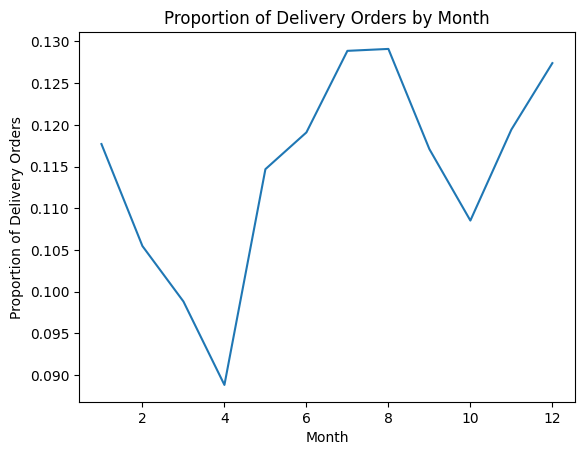

In [28]:
months = range(1, 13)

plt.plot(months, proportions)
plt.xlabel('Month')
plt.ylabel('Proportion of Delivery Orders')
plt.title('Proportion of Delivery Orders by Month')
plt.show()


- Despite March being one of the top months for overall orders, it surprisingly has a low number of delivery orders. On the other hand, July and August stand out with the highest proportion of delivery orders relative to total orders, indicating a significant preference for delivery during these months. It's essential to consider November and December as well, as they also show notable proportions of delivery orders.

5. Analysis of Drink Orders Variation Across Months

- In the below code, we group the data by the 'MONTH' and calculate the average number of drink orders for each month using the mean() function and store it in the 'drink_orders'

- Next, we plot the average number of drink orders against the months using the plt.plot() function with 'months' on the x-axis and 'drink_orders' on the y-axis.

- Finally, we give the plot the title 'Average Number of Drink Orders by Month' to provide a clear overview of the relationship between temperature (represented by months) and the average number of drink orders.

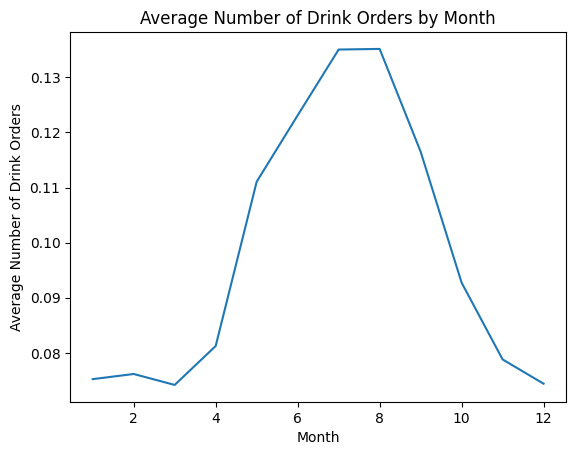

In [29]:
drink_orders = df_dig.groupby('MONTH')['DRINKS'].mean()
plt.plot(months, drink_orders)
plt.xlabel('Month')
plt.ylabel('Average Number of Drink Orders')
plt.title('Average Number of Drink Orders by Month')
plt.show()

##### Conclusion - 

    - Based on the relationship between weather and customers' ordering patterns, the analysis indicates a seasonal effect on delivery orders. 

    - Specifically, the higher proportion of delivery orders in July and August, typical summer months, suggests a preference for delivery during warmer weather. 

    - This aligns with the common notion that people tend to spend more time outdoors and opt for delivery services to enjoy meals at home, picnics, or outdoor gatherings. 

    - With the highest number of delivery orders at Upper West Side and considering the preference for summer months, Dig should launch his new product line at this location during the summer season.

#### Final Analysis and conclusion:

Throughout this project, we conducted a comprehensive analysis of Dig's delivery-specific data to gain insights into customer preferences and ordering patterns. Based on the findings from each section, we have formulated the following recommendations for Dig's new delivery service:

##### Menu Optimization:

    - We recommend including popular items such as Charred Chicken Marketbowl, Farm Greens with Mint, Roasted Wild Alaskan Salmon Marketbowl, Classic Brown Rice, Snap Peas, and Cookies in the delivery-specific menu.
    - Drinks may not be a viable addition, as only 9% of customers order them for delivery.

##### Optimal Locations:

    - The Upper East and Upper West sides have shown remarkably high delivery demands, making them excellent locations to conduct a pilot program.
    - NYU, with its constant bustling crowd of students, is also a promising choice for launching the delivery service successfully.

##### Healthier Options:

    - Our analysis indicates that customers who choose salad-based bowls tend to order fewer cookies with their orders.
    - Therefore, we suggest Dig include healthier options in the menu, focusing on salad-based bowls with nutritious mains and sides, appealing to health-conscious customers seeking lower-calorie meal options.

##### Seasonal Considerations:

    - The analysis suggests a seasonal effect on delivery orders, with higher proportions during warmer months like July and August.
    - We recommend launching the new product line, considering the highest number of delivery orders, during the summer season at the Upper West Side.


In conclusion, by leveraging the insights obtained from the data analysis, Dig can craft a successful delivery-specific menu that caters to customer preferences and enhances the overall delivery experience. The optimal location choices and focus on healthier options align with the evolving customer demands and can contribute to increased customer satisfaction and engagement. With these strategic decisions, Dig's new delivery service is poised to thrive and achieve significant success in the competitive food delivery industry.